In [97]:
from imblearn.over_sampling import ADASYN, SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
df = pd.read_csv(r'C:\Users\PON\Python\Homework\data\dermatology.csv')

In [99]:
df['age'] = df['age'].fillna(0.0)

In [100]:
df, df_test = train_test_split(df)

[]

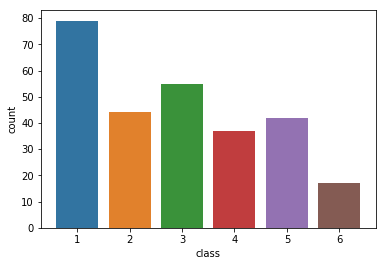

In [104]:
sns.countplot(df['class'])
plt.plot()

In [105]:
ada = ADASYN(random_state=9469451, n_jobs=4)

In [106]:
ada_values, ada_classes = ada.fit_resample(df.drop(columns=['class']), df['class'])
ada_data = np.hstack((ada_values, ada_classes.reshape(-1,1)))

In [107]:
df_ada = pd.DataFrame(ada_data, columns=df.columns)

[]

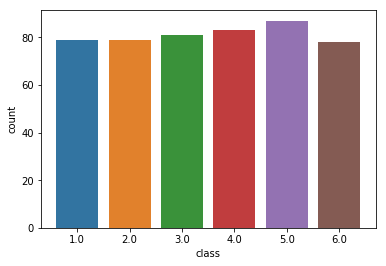

In [108]:
sns.countplot(df_ada['class'])
plt.plot()

In [109]:
smt = SMOTE(n_jobs=4, random_state=9469451)

In [110]:
smt_values, smt_classes = smt.fit_resample(df.drop(columns=['class']), df['class'])
smt_data = np.hstack((smt_values, smt_classes.reshape(-1,1)))

In [111]:
df_smt = pd.DataFrame(smt_data, columns=df.columns)

[]

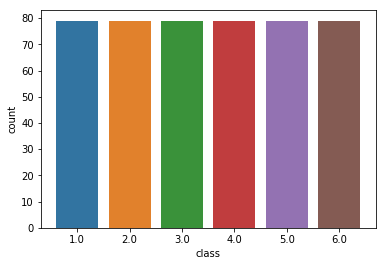

In [112]:
sns.countplot(df_smt['class'])
plt.plot()

In [115]:
dt_null = DecisionTreeClassifier(max_depth=2)
dt_ada = DecisionTreeClassifier(max_depth=2)
dt_smt = DecisionTreeClassifier(max_depth=2)

dt_null.fit(df.drop(columns='class'), df['class'])
dt_ada.fit(df_ada.drop(columns='class'), df_ada['class'])
dt_smt.fit(df_smt.drop(columns='class'), df_smt['class'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [117]:
gt = df_test['class']
data = df_test.drop(columns='class')

preds_null = dt_null.predict(data)
preds_ada = dt_ada.predict(data)
preds_smt = dt_smt.predict(data)

In [121]:
from sklearn.metrics import f1_score

print('Null F1 Score: ', f1_score(gt, preds_null, average='micro'))
print('ADASYN F1 Score: ', f1_score(gt, preds_ada, average='micro'))
print('SMOTE F1 Score: ', f1_score(gt, preds_smt, average='micro'))

Null F1 Score:  0.7065217391304348
ADASYN F1 Score:  0.4239130434782609
SMOTE F1 Score:  0.5
